In [21]:
#lets try a second model and see what we end up with 
#import dependencies 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mpld3
plt.style.use('bmh')

In [22]:
#create data frame 
df = pd.read_csv('Resources/BTC-USD.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-08,395.753998,415.562988,389.950012,415.562988,415.562988,57801400
1,2015-12-09,414.441010,423.119995,406.290985,417.562988,417.562988,90917200
2,2015-12-10,417.988007,419.509003,411.548004,415.479004,415.479004,52138900
3,2015-12-11,415.281006,451.937988,415.281006,451.937988,451.937988,110944000
4,2015-12-12,452.334991,469.102997,410.740997,434.997009,434.997009,131969000
5,2015-12-13,431.660004,441.679993,426.268005,433.755005,433.755005,55050600


In [23]:
#get only the adj. close price for this model 
df = df[['Adj Close']]
df.tail(4)

,Adj Close
1824,19154.230469
1825,19345.121094
1826,19191.630859
1827,18835.615234


In [24]:
#create variable for the amount of days you would like to predict the future close price
#for this model we will do the next 30 days 
future_predict = 30

#create new column with shifts (just moving everything up 30 days)
df['Prediction'] = df[['Adj Close']].shift(-future_predict)
df.tail(4)

,Adj Close,Prediction
1824,19154.230469,NaN
1825,19345.121094,NaN
1826,19191.630859,NaN
1827,18835.615234,NaN


In [25]:
#create data set as a numpy array 
independent_data = np.array(df.drop(['Prediction'], 1))

#remove the last 'future_predict' rows 
independent_data = independent_data[:-future_predict]
df.head(6)

,Adj Close,Prediction
0,415.562988,458.048004
1,417.562988,453.230011
2,415.479004,447.610992
3,451.937988,447.990997
4,434.997009,448.428009
5,433.755005,435.690002


In [26]:
#create data set as a numpy array 
dependent_data = np.array(df['Prediction'])

#remove the last 'future_predict' rows 
dependent_data = dependent_data[:-future_predict]
print(dependent_data)

[  458.048004   453.230011   447.610992 ... 19345.121094 19191.630859
 18835.615234]


In [27]:
#split data into 80% data and 20% testing
x_train, x_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size = 0.09)

In [28]:
#create and train SVM Regressor 
svr_m = SVR(kernel = 'rbf', C=1e3, gamma = 0.8)

svr_m.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.8,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
#testing our svm model 
svm_accuracy = svr_m.score(x_test, y_test)
svm_train_accuracy = svr_m.score(x_train, y_train)
print ("svm accuracy: ", svm_accuracy)
print ("svm train accuracy: ", svm_train_accuracy)

svm accuracy:  0.2932632129285596
svm train accuracy:  0.5330315813751962


In [30]:
#create and train linear regression model 
lr = LinearRegression()
#train the model 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#testing the linear regresssion model now 
lr_accuracy = lr.score(x_test, y_test)
lr_train_accuracy = lr.score(x_train, y_train)
print("linear regression test accuracy: ", lr_accuracy)
print("linear regression train accuracy: ", lr_train_accuracy)

linear regression test accuracy:  0.8553872838148902
linear regression train accuracy:  0.7997864540430109


In [32]:
#looks like linear regression model gives us a better accuracy 
future = np.array(df.drop(['Prediction'], 1))[-future_predict:]
print(future)

[[15332.31543 ]
 [15290.902344]
 [15701.339844]
 [16276.34375 ]
 [16317.808594]
 [16068.138672]
 [15955.587891]
 [16716.111328]
 [17645.40625 ]
 [17804.005859]
 [17817.089844]
 [18621.314453]
 [18642.232422]
 [18370.001953]
 [18364.121094]
 [19107.464844]
 [18732.121094]
 [17150.623047]
 [17108.402344]
 [17717.414063]
 [18177.484375]
 [19625.835938]
 [18802.998047]
 [19201.091797]
 [19445.398438]
 [18699.765625]
 [19154.230469]
 [19345.121094]
 [19191.630859]
 [18835.615234]]


In [33]:
#print the linear regression predicitons for the next 'future_predict' days 
lr_prediction = lr.predict(future)
print(lr_prediction)

[15099.34582514 15060.1846906  15448.30351265 15992.03998575
 16031.2500638  15795.15663659 15688.72611661 16407.89398142
 17286.65591343 17436.63122861 17449.00373562 18209.49639994
 18229.27689634 17971.84971447 17966.2886435  18669.21101446
 18314.27762237 16818.77792002 16778.8530849  17354.74810179
 17789.80081397 19159.39424185 18381.30044438 18757.7467421
 18988.76853159 18283.68157178 18713.43362884 18893.94404642
 18748.80026885 18412.14398133]


In [34]:
#print the support vector regression model predicitons for the next 'future_predict' days 
svr_prediction = svr_m.predict(future)
print(svr_prediction)

[6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826
 6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826
 6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826
 6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826
 6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826
 6222.38415826 6222.38415826 6222.38415826 6222.38415826 6222.38415826]


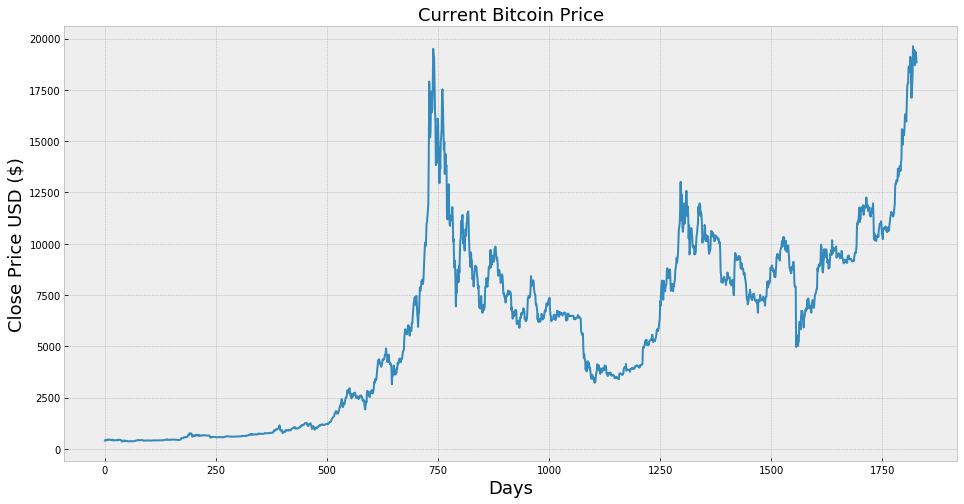

In [35]:
#Show the current trend for close price over the past 5 years to now 
plt.figure(figsize=(16,8))
plt.title('Current Bitcoin Price', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Adj Close'])
plt.show()
#plt.savefig('Resources/bitcoin_current.png')

In [36]:
original_data = df['Adj Close']
print(original_data)

0         415.562988
1         417.562988
2         415.479004
3         451.937988
4         434.997009
            ...     
1823    18699.765625
1824    19154.230469
1825    19345.121094
1826    19191.630859
1827    18835.615234
Name: Adj Close, Length: 1828, dtype: float64


In [37]:
prediction_data = df[independent_data.shape[0]:]
prediction_data['Prediction'] = lr_prediction

print(prediction_data)

         Adj Close    Prediction
1798  15332.315430  15099.345825
1799  15290.902344  15060.184691
1800  15701.339844  15448.303513
1801  16276.343750  15992.039986
1802  16317.808594  16031.250064
1803  16068.138672  15795.156637
1804  15955.587891  15688.726117
1805  16716.111328  16407.893981
1806  17645.406250  17286.655913
1807  17804.005859  17436.631229
1808  17817.089844  17449.003736
1809  18621.314453  18209.496400
1810  18642.232422  18229.276896
1811  18370.001953  17971.849714
1812  18364.121094  17966.288643
1813  19107.464844  18669.211014
1814  18732.121094  18314.277622
1815  17150.623047  16818.777920
1816  17108.402344  16778.853085
1817  17717.414063  17354.748102
1818  18177.484375  17789.800814
1819  19625.835938  19159.394242
1820  18802.998047  18381.300444
1821  19201.091797  18757.746742
1822  19445.398438  18988.768532
1823  18699.765625  18283.681572
1824  19154.230469  18713.433629
1825  19345.121094  18893.944046
1826  19191.630859  18748.800269
1827  1883

/Users/jcook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


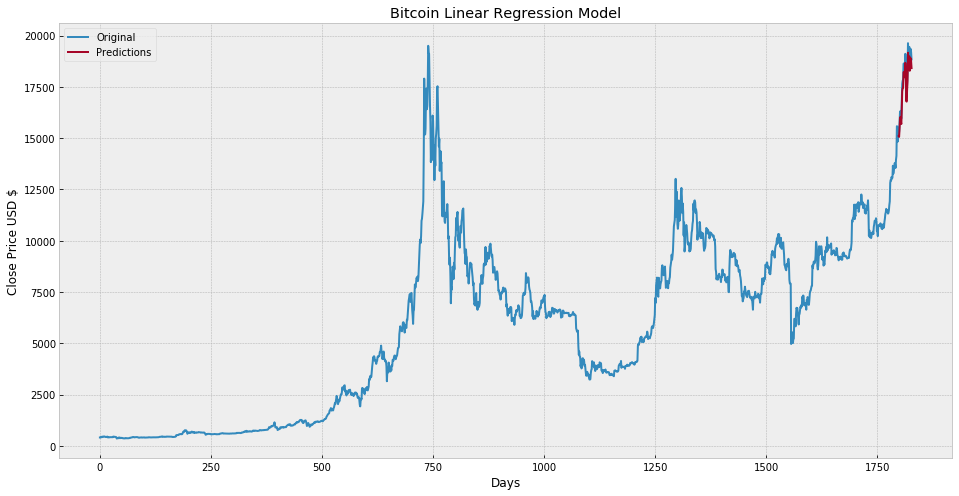

In [42]:
fig = plt.figure(figsize=(16,8))
plt.title('Bitcoin Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD $')
plt.plot(df['Adj Close'])
plt.plot(prediction_data['Prediction'])
plt.legend(['Original', 'Predictions'])
plt.show()
#plt.savefig('Resources/bitcoin_predictions.png')


In [46]:
html = prediction_data.to_html()

text_file = open('table1.html', 'w')
text_file.write(html)
text_file.close()

In [45]:
html_str = mpld3.fig_to_html(fig)
Html_file= open("table.html","w")
Html_file.write(html_str)
Html_file.close()